In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('train.csv')
print(df.describe())
print(df.info())



               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

[  3   1   4  12   0   2  78   6   8  10  36  14  24   5  72  60   9  48
  62  47  19 120  32   7  17  22  16  13  11  37  18  55  20  28  74  53
  25  84  76  30 132  96  46  15  50  56  54  23  92  29  27  49  44 144
  21  31  41  51  65  34 135  39  52  42 108  81  26  38  69 212  33  75
  95  80  63  61 255  89  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88  43 238 100]


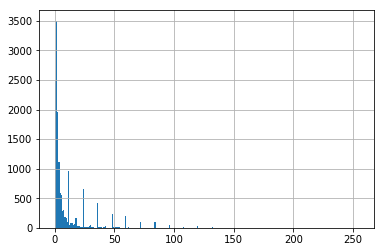

In [4]:
print(df['Age'].unique())
df['Age'].hist(bins=250)
plt.show()

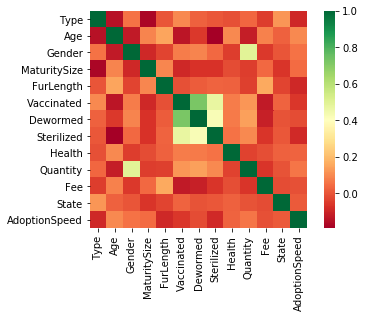

In [5]:
copy=df.drop(labels=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'PhotoAmt', 'VideoAmt'], axis=1)
sns.heatmap(copy.corr(), square=True, cmap='RdYlGn')

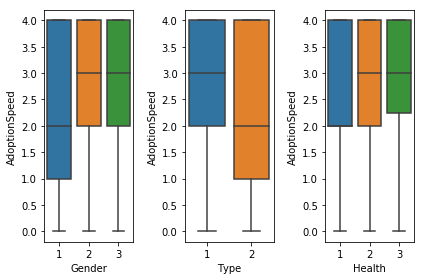

In [6]:
plt.subplot(1,3,1)
sns.boxplot(x='Gender',
y='AdoptionSpeed', data=df)
plt.ylabel('AdoptionSpeed')
plt.subplot(1,3,2)
sns.boxplot(x='Type',
y='AdoptionSpeed', data=df)
plt.ylabel('AdoptionSpeed')
plt.subplot(1,3,3)
sns.boxplot(x='Health',
y='AdoptionSpeed', data=df)
plt.ylabel('AdoptionSpeed')
plt.tight_layout()
plt.show()


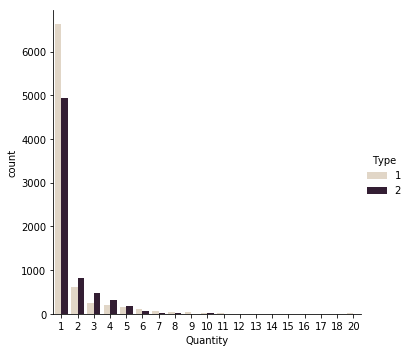

In [7]:
sns.catplot(x="Quantity", kind="count", hue='Type', palette="ch:.25", data=df)

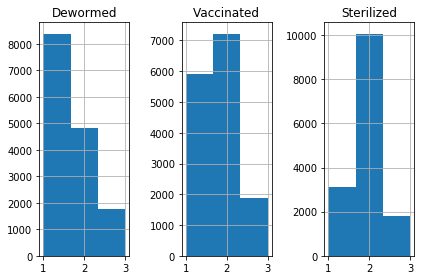

In [8]:
plt.subplot(1,3,1)
df['Dewormed'].hist(bins=3)
plt.title('Dewormed')
plt.subplot(1,3,2)
df['Vaccinated'].hist(bins=3)
plt.title('Vaccinated')
plt.subplot(1,3,3)
df['Sterilized'].hist(bins=3)
plt.title('Sterilized')
plt.tight_layout()
plt.show()